In [1]:
train_file_path = "C:/Users/shabbir.hasan/Documents/Hasan/Anaconda_rep/Kaggle/whats-cooking/train.json"

In [2]:
import json

In [3]:
with open(train_file_path, encoding='utf-8') as data_file:
    data = json.loads(data_file.read())

In [4]:
len(data)

39774

In [5]:
data[0]

{'id': 10259,
 'cuisine': 'greek',
 'ingredients': ['romaine lettuce',
  'black olives',
  'grape tomatoes',
  'garlic',
  'pepper',
  'purple onion',
  'seasoning',
  'garbanzo beans',
  'feta cheese crumbles']}

In [6]:
data[1000]

{'id': 36837,
 'cuisine': 'italian',
 'ingredients': ['marinara sauce',
  'goat cheese',
  'minced garlic',
  'salt',
  'ground lamb',
  'roasted red peppers',
  'chopped onion',
  'black pepper',
  'refrigerated pizza dough',
  'italian seasoning']}

In [7]:
from pandas.io.json import json_normalize

In [8]:
json_normalize(data[0])

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."


In [9]:
def flatten_json(y):
    out = {}

    def flatten(x, name=''):
        if type(x) is dict:
            for a in x:
                flatten(x[a], name + a + '_')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = x

    flatten(y)
    return out

In [10]:

json_normalize(flatten_json(data[1]))

,cuisine,id,ingredients_0,ingredients_1,ingredients_10,ingredients_2,ingredients_3,ingredients_4,ingredients_5,ingredients_6,ingredients_7,ingredients_8,ingredients_9
0,southern_us,25693,plain flour,ground pepper,vegetable oil,salt,tomatoes,ground black pepper,thyme,eggs,green tomatoes,yellow corn meal,milk


In [11]:
import pandas as pd
pd.DataFrame(json_normalize(flatten_json(data[1:5])))

,0_cuisine,0_id,0_ingredients_0,0_ingredients_1,0_ingredients_10,0_ingredients_2,0_ingredients_3,0_ingredients_4,0_ingredients_5,0_ingredients_6,...,3_ingredients_18,3_ingredients_19,3_ingredients_2,3_ingredients_3,3_ingredients_4,3_ingredients_5,3_ingredients_6,3_ingredients_7,3_ingredients_8,3_ingredients_9
0,southern_us,25693,plain flour,ground pepper,vegetable oil,salt,tomatoes,ground black pepper,thyme,eggs,...,natural yogurt,bay leaf,cornflour,cayenne pepper,onions,garlic paste,milk,butter,salt,lemon juice


In [12]:
from pandas.io.json import json_normalize

In [13]:
df = json_normalize(data)

In [14]:
df.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [15]:
df.ingredients.head()

0    [romaine lettuce, black olives, grape tomatoes...
1    [plain flour, ground pepper, salt, tomatoes, g...
2    [eggs, pepper, salt, mayonaise, cooking oil, g...
3                  [water, vegetable oil, wheat, salt]
4    [black pepper, shallots, cornflour, cayenne pe...
Name: ingredients, dtype: object

In [135]:
ingredients_holder = {}

In [136]:
def creating_dic_all_ingredients(ingre):
    if ingre in ingredients_holder:
        ingredients_holder[ingre] = ingredients_holder[ingre] + 1
    else:
        ingredients_holder[ingre] = 1        

In [137]:
def sending_each_list_element_to_dic(df_one_element):
    for i in df_one_element:
        creating_dic_all_ingredients(i)

In [138]:
df['ingredients'].apply(sending_each_list_element_to_dic)

0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9        None
10       None
11       None
12       None
13       None
14       None
15       None
16       None
17       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
         ... 
39744    None
39745    None
39746    None
39747    None
39748    None
39749    None
39750    None
39751    None
39752    None
39753    None
39754    None
39755    None
39756    None
39757    None
39758    None
39759    None
39760    None
39761    None
39762    None
39763    None
39764    None
39765    None
39766    None
39767    None
39768    None
39769    None
39770    None
39771    None
39772    None
39773    None
Name: ingredients, Length: 39774, dtype: object

In [139]:
ingredients_holder

{'romaine lettuce': 270,
 'black olives': 229,
 'grape tomatoes': 228,
 'garlic': 7380,
 'pepper': 4438,
 'purple onion': 1896,
 'seasoning': 137,
 'garbanzo beans': 148,
 'feta cheese crumbles': 358,
 'plain flour': 154,
 'ground pepper': 385,
 'salt': 18049,
 'tomatoes': 3058,
 'ground black pepper': 4785,
 'thyme': 361,
 'eggs': 3388,
 'green tomatoes': 108,
 'yellow corn meal': 341,
 'milk': 2263,
 'vegetable oil': 4385,
 'mayonaise': 781,
 'cooking oil': 483,
 'green chilies': 768,
 'grilled chicken breasts': 5,
 'garlic powder': 1442,
 'yellow onion': 1184,
 'soy sauce': 3296,
 'butter': 4848,
 'chicken livers': 65,
 'water': 7457,
 'wheat': 26,
 'black pepper': 2627,
 'shallots': 1477,
 'cornflour': 103,
 'cayenne pepper': 1523,
 'onions': 7972,
 'garlic paste': 282,
 'lemon juice': 1395,
 'chili powder': 2036,
 'passata': 24,
 'oil': 1970,
 'ground cumin': 2747,
 'boneless chicken skinless thigh': 343,
 'garam masala': 925,
 'double cream': 40,
 'natural yogurt': 18,
 'bay leaf

In [150]:
df = pd.DataFrame(list(ingredients_holder.items()), columns=['Ingredient', 'counts'])


In [158]:
df.sort_values('counts', ascending=False)

,Ingredient,counts
11,salt,18049
54,olive oil,7972
35,onions,7972
29,water,7457
3,garlic,7380
47,sugar,6434
105,garlic cloves,6237
27,butter,4848
13,ground black pepper,4785
115,all-purpose flour,4632


In [159]:
import seaborn as sn

C:\Users\shabbir.hasan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


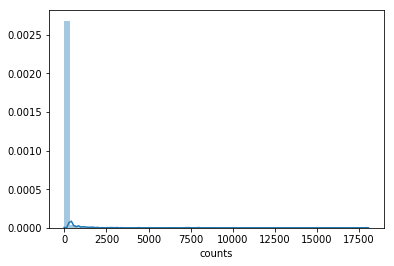

In [160]:
sn.distplot(df.counts)